In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /home/inflaton/code/sme-invoicing-assistant


In [3]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /home/inflaton/code/sme-invoicing-assistant/.env


True

In [4]:
import pandas as pd
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect("results/llama3.2-vision_11b-qwen2.5_72b/emails.db")
# conn = sqlite3.connect("src/data/db/llama3.2-vision_11b-qwen2.5_72b/emails.db")

# Write your SQL query
query = "SELECT * FROM emails"

# Read the query results into a pandas DataFrame
df = pd.read_sql(query, conn)

df.head(5)

,email_id,sender_email,recipient_email,subject,email_body,attachments,process_status,response,start_time,end_time,total_time,successful_requests,total_tokens,prompt_tokens,completion_tokens,total_cost
0,93185A89130149C0A842968E4AFDCAA2,RobinLevine@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 43925,Hi Tanya ! Please find attached payment screen...,transaction_1.jpeg,SUCCESS,"{""content"": ""DONE""}",2025-01-20T21:08:52.132058,2025-01-20T21:09:48.709388,56.5773,8,2669,2273,396,0.0
1,614972488B7B411BAEA4814CF066CDAA,StevenNixon@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 51782,Hi Tanya ! Please find attached payment screen...,transaction_2.jpeg,SUCCESS,"{""content"": ""DONE""}",2025-01-20T21:09:48.718054,2025-01-20T21:10:49.748750,61.0307,28,9970,8395,1575,0.0
2,C484ABEB38F44D29960B1CEF58510627,MadisonFord@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 42968,Hi Tanya ! Please find attached payment screen...,transaction_3.jpeg,SUCCESS,"{""content"": ""DONE""}",2025-01-20T21:10:49.756916,2025-01-20T21:11:49.322336,59.5654,60,22143,18487,3656,0.0
3,706B3403E8024178948B3BFBF9E64A25,KathrynJones@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 92948,Hi Tanya ! Please find attached payment screen...,transaction_4.jpeg,SUCCESS,"{""content"": ""DONE""}",2025-01-20T21:11:49.332251,2025-01-20T21:12:59.537244,70.2050,104,39615,32866,6749,0.0
4,86838440CA6C472AACFA3FCE1382609C,ChristineOwens@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 20304,Hi Tanya ! Please find attached payment screen...,transaction_5.jpeg,SUCCESS,"{""content"": ""DONE""}",2025-01-20T21:12:59.546452,2025-01-20T21:13:51.116058,51.5696,160,62190,51439,10751,0.0


In [5]:
import json

json_file = "results/llama3.2-vision_11b-qwen2.5_72b/full_logs.json"

if "full_logs" in df.columns:
    last_completed = df[df["full_logs"] != ""].iloc[-1]
    full_logs = json.loads(last_completed["full_logs"])
    json.dump(full_logs, open(json_file, "w"), indent=4)
    conn.execute("ALTER TABLE emails DROP COLUMN full_logs")
    conn.execute("VACUUM")
    conn.commit()
    print("full_logs saved to", json_file)
else:
    full_logs = json.load(open(json_file))
    print("full_logs loaded from", json_file)

# Close the connection
conn.close()

full_logs loaded from results/llama3.2-vision_11b-qwen2.5_72b/full_logs.json


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   email_id             2000 non-null   object
 1   sender_email         2000 non-null   object
 2   recipient_email      2000 non-null   object
 3   subject              2000 non-null   object
 4   email_body           2000 non-null   object
 5   attachments          2000 non-null   object
 6   process_status       2000 non-null   object
 7   response             2000 non-null   object
 8   start_time           2000 non-null   object
 9   end_time             2000 non-null   object
 10  total_time           2000 non-null   object
 11  successful_requests  2000 non-null   object
 12  total_tokens         2000 non-null   object
 13  prompt_tokens        2000 non-null   object
 14  completion_tokens    2000 non-null   object
 15  total_cost           2000 non-null   object
dtypes: obj

In [7]:
df.describe()

,email_id,sender_email,recipient_email,subject,email_body,attachments,process_status,response,start_time,end_time,total_time,successful_requests,total_tokens,prompt_tokens,completion_tokens,total_cost
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,2000,1988,1,1947,2000,1001,3,101,2000,2000,1985,2000,2000,2000,2000,1
top,0527b19a-4b60-4768-9c45-c23fb3bc1ffa,MichaelJones@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice I13212,Subject: Payment Confirmation for Invoice I178...,,SUCCESS,"{""content"": ""DONE""}",2025-01-22T23:48:35.237256,2025-01-22T23:49:24.802621,51.1529,75,47819,38413,9406,0.0
freq,1,3,2000,3,1,1000,1939,1900,1,1,2,1,1,1,1,2000


In [8]:
# plot the distribution of categories
import matplotlib.pyplot as plt


def plot_value_distribution(df2, col="category", top_n=10):
    df2[col].value_counts()[:top_n].plot(kind="bar")
    plt.title(f"Distribution of {col}")

    # add the count on top of the bars
    for i in range(len(df2[col].value_counts()[:top_n])):
        count = df2[col].value_counts().values[i]
        plt.text(i, count, count, ha="center")

    plt.show()

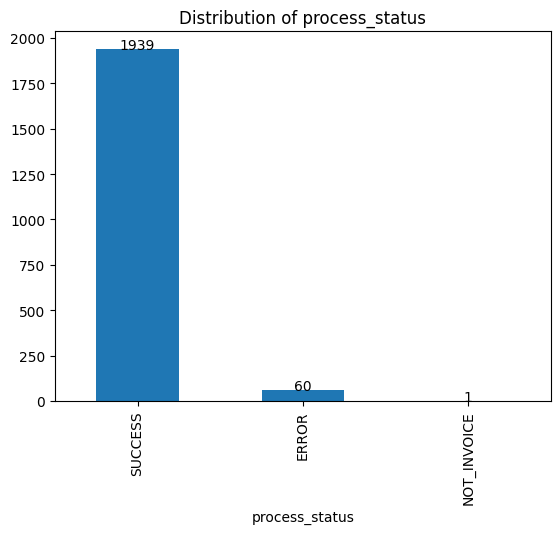

In [9]:
plot_value_distribution(df, "process_status")

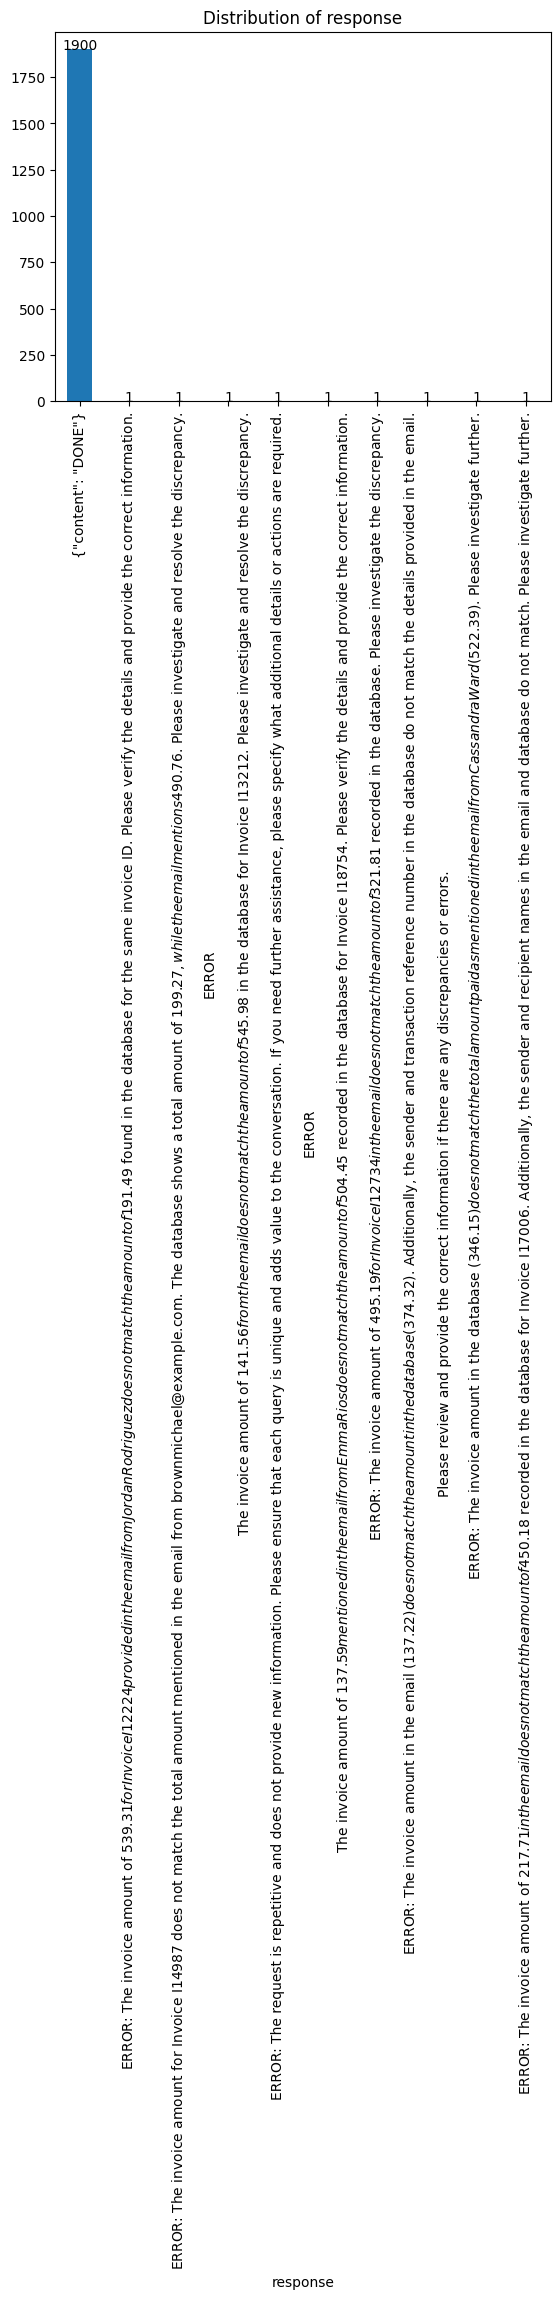

In [10]:
plot_value_distribution(df, "response")

In [11]:
df["end_time"] = pd.to_datetime(df["end_time"])
df["start_time"] = pd.to_datetime(df["start_time"])
df["duration"] = (df["end_time"] - df["start_time"]).dt.total_seconds()

In [12]:
df[["duration", "total_time"]].head()

,duration,total_time
0,56.577330,56.5773
1,61.030696,61.0307
2,59.565420,59.5654
3,70.204993,70.2050
4,51.569606,51.5696


<Axes: ylabel='Frequency'>

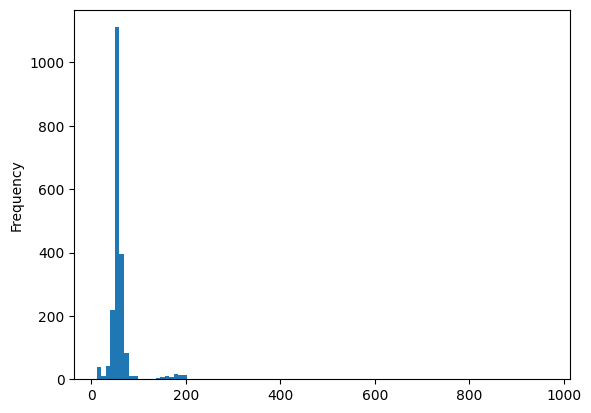

In [13]:
# plot the distribution of duration
df["duration"].plot(kind="hist", bins=100)

In [14]:
df[df["duration"] > 899]

,email_id,sender_email,recipient_email,subject,email_body,attachments,process_status,response,start_time,end_time,total_time,successful_requests,total_tokens,prompt_tokens,completion_tokens,total_cost,duration
610,A90CC4AC208D4D879B9B6A705E93F388,KyleFerguson@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 78472,Hi Tanya ! Please find attached payment screen...,transaction_611.jpeg,SUCCESS,"{""content"": ""DONE""}",2025-01-21 08:28:35.053817,2025-01-21 08:44:41.452332,966.3985,2733027,1378152210,1185465530,192686680,0.0,966.398515


In [15]:
df["duration"].describe()

count    2000.000000
mean       59.239704
std        33.534246
min        11.669063
25%        50.606712
50%        52.649380
75%        60.087938
max       966.398515
Name: duration, dtype: float64

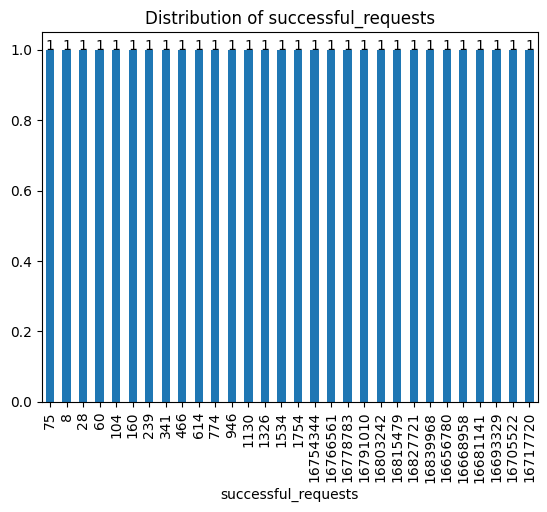

In [16]:
plot_value_distribution(df, "successful_requests", top_n=30)

In [17]:
df["process_status"].value_counts()

process_status
SUCCESS        1939
ERROR            60
NOT_INVOICE       1
Name: count, dtype: int64

In [18]:
success_rate = df["process_status"].value_counts()["SUCCESS"] / len(df)
success_rate

0.9695

In [19]:
def total_power_in_watt(file_path):
    df = pd.read_csv(file_path)
    return df["CPU Package Power [W]"].mean() + df["GPU Power [W]"].mean()

In [20]:
power_idle = total_power_in_watt("results/power_idle.csv")
power_idle

29.873

In [21]:
power_with_vision = total_power_in_watt(
    "results/llama3.2-vision_11b-qwen2.5_72b/power_with_vision.csv"
)
power_without_vision = total_power_in_watt(
    "results/llama3.2-vision_11b-qwen2.5_72b/power_without_vision.csv"
)
power_with_vision, power_without_vision

(314.514, 313.5394)

In [22]:
mean_response_time = df["duration"].mean()
mean_response_time

59.2397037325

In [23]:
average_energy_consumption = (
    (power_with_vision + power_without_vision) / 2 - power_idle
) * mean_response_time
average_energy_consumption

16833.181002493686

In [24]:
df.describe()

,start_time,end_time,duration
count,2000,2000,2000.000000
mean,2025-01-21 14:52:09.770294784,2025-01-21 14:53:09.009998592,59.239704
min,2025-01-20 21:08:52.132058,2025-01-20 21:09:48.709388,11.669063
25%,2025-01-21 06:22:42.719959808,2025-01-21 06:24:09.788468480,50.606712
50%,2025-01-21 16:01:47.750591232,2025-01-21 16:02:37.797214720,52.649380
75%,2025-01-21 23:13:05.933732096,2025-01-21 23:13:58.874967040,60.087938
max,2025-01-22 23:48:35.237256,2025-01-22 23:49:24.802621,966.398515
std,NaN,NaN,33.534246


In [25]:
row = df[df["process_status"] == "NOT_INVOICE"].iloc[0]
row

email_id                                8D2F793315854E01ADD4A7A552BE478D
sender_email                                   SherriDaniels@example.com
recipient_email                             tanya.official.456@gmail.com
subject                       Payment Confirmation for Invoice ID: 30509
email_body             Hi Tanya ! Please find attached payment screen...
attachments                                         transaction_493.jpeg
process_status                                               NOT_INVOICE
response               NA - The email and OCR data do not contain the...
start_time                                    2025-01-21 06:13:11.022480
end_time                                      2025-01-21 06:13:44.187156
total_time                                                       33.1647
successful_requests                                              1786806
total_tokens                                                   904103279
prompt_tokens                                      

In [26]:
full_logs[0]

{'name': 'input',
 'type': 'HumanMessage',
 'content': '\n                Help to reconcile invoices using the following email:\n\n                \n            Sender: victoria95@example.com\n            Subject: Payment Confirmation for Invoice I16219\n            Body: Subject: Payment Confirmation for Invoice I16219\n                Raymond Thomas <victoria95@example.com>\n                Sat, Jan 04, 2025, 02:36 PM\n                Dear Tanya, I hope this message finds you well.I am writing to confirm that we have successfully made the payment for Invoice I16219, related to our recent order with you. Here are the details:  \n                Description:\n                Invoice Date: November 29, 2024\n                Item: Co-ord sets Men\n                Quantity: 2\n                Subtotal: $212.44\n                Tax (10%): $21.24\n                Shipping (if applicable): $19.91\n                Total Amount paid: $253.59\n                Transaction Reference Number - TXN-

In [27]:
for i, log in enumerate(full_logs):
    if row["attachments"] in log["content"]:
        print(i)
        break

In [28]:
full_logs[i : i + 5]

[{'name': 'invoice_db_update_tool',
  'type': 'ToolMessage',
  'content': '{"content": "DONE"}',
  'timestamp': '2025-01-22T23:49:24.783800',
  'usage': {'input_tokens': 0,
   'output_tokens': 0,
   'total_tokens': 0,
   'input_token_details': {'audio': 0, 'cache_read': 0},
   'output_token_details': {'audio': 0, 'reasoning': 0}},
  'model_name': '',
  'additional_kwargs': {}}]